### Codio Activity 22.7: Multi-Class Classification with `keras`

**Expected Time = 90 minutes**

**Total Points = 60**

This activity focuses on using `keras` to build a multi-class classification model using the wine dataset from the earlier module. You will use the version of the dataset loaded with scikitlearn.  Below, the data is loaded and prepared.  Rather than creating a train and test set, you will use the `validation_split` argument of the `.fit` function.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2024-07-13 12:53:05.965562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 12:53:06.995375: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 12:53:07.299062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 12:53:07.891921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 12:53:08.050076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 12:53:09.069910: I tensorflow/core/platform/cpu_feature_gu

In [2]:
wine = load_wine(as_frame=True)

In [3]:
# Quick reminder on information contained in the data
# print(wine.DESCR)

In [4]:
wine.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
X, y = wine.data, wine.target

In [6]:
# target is three classes with similar representation
wine.frame["target"].value_counts(normalize=True)

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

[Back to top](#-Index)

### Problem 1

#### Preparing the data

**10 Points**

Because you are solving a multi-class classification problem, two things will change from the binary case.  First, you will need to present the network with a one hot encoded version of the *target*.  This can be accomplished using the `to_categorical` function.  Build the one hot encoded version of the target and assign as an array to `y_ohe` below.



In [7]:
### GRADED
y_ohe = to_categorical(y)

### ANSWER CHECK
print(y_ohe[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


[Back to top](#-Index)

### Problem 2

#### The Network Architecture

**10 Points**

Create a `Sequential` model named `model` with one hidden layer containing 100 nodes using the `relu` activation function.  For the output layer, be sure to use the `softmax` activation with 3 nodes (because of the three classes) instead of the `sigmoid` used for binary classification.  

In [8]:
### GRADED
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
        Dense(100, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)

### ANSWER CHECK
print(model)

<Sequential name=sequential, built=False>


[Back to top](#-Index)

### Problem 3

#### Compiling the model

**10 Points**

For the compilation, rather than binary crossentropy as a loss function, you are to use `categorical_crossentropy`.  Continue to use `accuracy` as the metric.  Execute the `compile` function appropriately below.

In [10]:
### GRADED
tf.random.set_seed(42)
## Uncomment and complete
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

### ANSWER CHECK
model.loss

'categorical_crossentropy'

[Back to top](#-Index)

### Problem 4

#### Fitting the model

**10 Points**

Now, fit the model using the following settings:

- `epochs = 100`
- `validation_split = 0.2`
- `verbose = 0`

and assign your fit model to the `history` variable as before.  

In [11]:
### GRADED
tf.random.set_seed(42)
history = model.fit(x=X, y=y_ohe, epochs=100, validation_split=0.2, verbose=0)

### ANSWER CHECK
print(history.history["accuracy"][-1])
print(history.history["val_accuracy"][-1])

0.7394366264343262
0.9166666865348816


[Back to top](#-Index)

### Problem 5

#### Is the model overfit?

**10 Points**

Visualize your loss and accuracy for both the train and validation sets to determine if the model overfit the data? Assign the accuracies as `accuracies` and validation accuracies as `validation_accuracies` below and uncomment the code to visualize the results of training.

In [15]:
### GRADED
accuracies = history.history["accuracy"]
validation_accuracies = history.history["val_accuracy"]

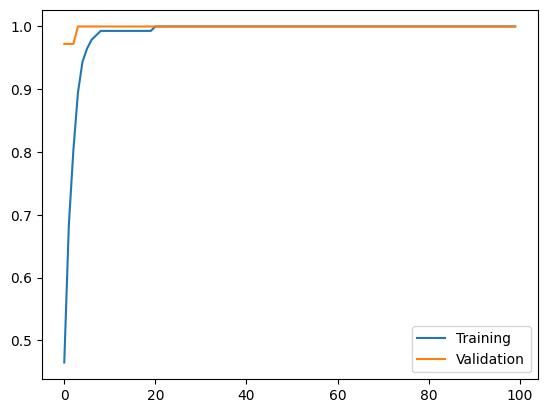

In [16]:
## Uncomment to visualize
plt.plot(accuracies, label="Training")
plt.plot(validation_accuracies, label="Validation")
plt.legend()

[Back to top](#-Index)

### Problem 6

#### A second model

**10 Points**

To deal with the above results, one thing to note is the neural networks are sensitive to the scale of the data.  Build a second model named `model_2` below with identical settings to that model above.  Fit this to a scaled version of the `X` data named `X_scaled`, and uncomment the code to plot the results below.  

In [13]:
### GRADED
tf.random.set_seed(42)
X_scaled = StandardScaler().fit_transform(X)
model_2 = tf.keras.Sequential(
    [
        Dense(100, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model_2.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)
history = model_2.fit(x=X_scaled, y=y_ohe, epochs=100, validation_split=0.2, verbose=0)
accuracies = history.history["accuracy"]
validation_accuracies = history.history["val_accuracy"]

print(history.history["accuracy"][2])
print(history.history["val_accuracy"][2])

0.8028169274330139
0.9722222089767456


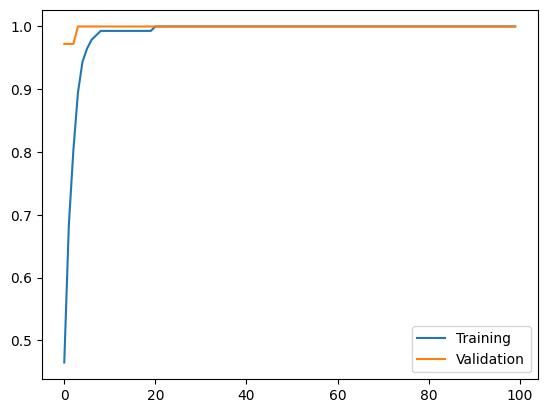

In [14]:
plt.plot(accuracies, label="Training")
plt.plot(validation_accuracies, label="Validation")
plt.legend()